# 0️⃣ Inicializar ambiente

In [1]:
# Este bloque es con la finalidad de garantizar que existan todas las dependencias, independiente donde se ejecute este notebook.

import subprocess
import sys
from importlib.metadata import version

# Imprimimos datos del entorno.
print("🟦 List Environment")
capture = subprocess.run([sys.executable, "--version"],capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"✅ {captureText}")
capture = subprocess.run([sys.executable, "-m", "pip", "--version"] ,capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"✅ {captureText}")
print("", end="\n\n")

print("🟦 Instalando bibliotecas externas")

print("✅ Instalando numpy")
# Ejecutamos el comando de consola, python -m pip install numpy y la salida de ese comando la mandamos al dispositivo /dev/null para que no salga en pantalla.
# Este comando nos permite instalar la lib numpy con el gestor de paquetes de Python pip.
subprocess.run([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL) 
# Como estamos seguros de la instalación de la library procedemos a importar.
import numpy as numpy

# Se hace el mismo paso para todas las libraries que no vienen en los módulos o paquetes estándar de Python.
print("✅ Instalando pandas")
subprocess.run([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL)
import pandas as pandas

print("✅ Installing matplotlib")
subprocess.run([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL)
import matplotlib as matplotlib

print("✅ Installing seaborn")
subprocess.run([sys.executable, "-m", "pip", "install", "seaborn"], stdout=subprocess.DEVNULL)
import seaborn as sns

print("✅ Installing tabulate") # Revisar Python Tabulate: A Full Guide - https://www.datacamp.com/tutorial/python-tabulate
subprocess.run([sys.executable, "-m", "pip", "install", "tabulate"], stdout=subprocess.DEVNULL)
from tabulate import tabulate 

print("✅ Installing pillow")
subprocess.run([sys.executable, "-m", "pip", "install", "pillow"], stdout=subprocess.DEVNULL)
import PIL as pillow

print("✅ Installing requests")
subprocess.run([sys.executable, "-m", "pip", "install", "requests"], stdout=subprocess.DEVNULL)
import requests


# Importando otras bibliotecas(libraries)
import matplotlib.pyplot as plt
import datetime
import random

🟦 List Environment
✅ Python 3.13.5
✅ pip 25.2 from c:\Users\mcsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)


🟦 Instalando bibliotecas externas
✅ Instalando numpy
✅ Instalando pandas
✅ Installing matplotlib
✅ Installing seaborn
✅ Installing tabulate
✅ Installing pillow
✅ Installing requests


# 1️⃣ Generar Dataset

In [2]:
# Estas constantes permite modificar el experimento. Modificar a conveniencia del tester.
DATA_SIZE = 1000  # Número total de registros del dataset(DataFrame) a generar.
PRODUCT_QUANTITY = 1000  # Número total de productos a generar.
CUSTOMER_QUANTITY = 1000  # Número total de clientes a generar.
TRANSACTION_MAX_ITEMS = (
    20  # Número máximo de items de venta de productos en una transacción a generar.
)
POSITIVE_NUMBER_THRESHOLD = 90  # Umbral para generar un valor numérico positivo, si es menor o igual a 90 se toma el valor positivo y si es mayor se toma otro valor.
NOT_NULL_VALUE_THRESHOLD = 90  # Umbral para generar un valor no nulo, si es menor o igual a 90 se toma el valor no nulo y si es mayor se toma nulo(None).
MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM = (
    100  # Maximo de cantidad de productos en un item de la transacción.
)
MIN_PRODUCT_PRICE = 1.00  # Precio mínimo de un producto.
MAX_PRODUCT_PRICE = 500.00  # Precio máximo de un producto.


# Esta función muestra información de un pandas.DataFrame con es su información, descripción, las primeras filas y las últimas filas.
def DisplayDataFrameInfo(
    df: pandas.DataFrame,
    title,
    showInfo=True,
    showDescription=True,
    showHead=True,
    showTail=True,
    headQty=5,
    tailQty=5,
):
    print(f"🟦 DataFrame - {title}")
    if showInfo:
        print("✅ Info")
        print()
    print(df.info())
    if showDescription:
        print("✅ Describe")
        print(df.describe())
        print()
    if showHead:
        print("✅ Head")
        # Utilizamos tabulate que nos permite imprimir de manera elegante la tabla.
        print(tabulate(df.head(headQty), headers="keys", tablefmt="fancy_grid"))
        print()
    if showTail:
        print("✅ Tail")
        print(tabulate(df.tail(tailQty), headers="keys", tablefmt="fancy_grid"))
        print()


# Esta función ayuda a seleccionar uno de los dos valores al azar, si valor obtenido al azar entre 1 y 100 es menor o igual que el umbral se toma el primer valor y si es mayor al umbral se toma el segundo valor.
def SelectValueBelowOrEqualsThreshold(threshold: int, value1, value2):
    threshold = threshold % 100
    return value1 if random.randint(0, 100) <= threshold else value2


# Funcion que permite generar todo el dataset
def GenerateRandomData():
    # Nombres de ciudades precargadas para no generar datos abstractos al ojo humano.
    cities = [
        "Quito",
        "Guayaquil",
        "Cuenca",
        "Santo Domingo",
        "Machala",
        "Portoviejo",
        "Loja",
        "Ambato",
        "UIO"
        "Riobamba",
        "Ibarra",
        "Latacunga",
        "Esme",
        "Quitof",
        "Babahoyo",
        "Tulcán",
        "GYE",
        "Tena",
        "Puyo",
        "Nueva Loja",
        "Zamora",
        "Macas",
        "Esmeraldas",
        "Guaranda",
        "Puerto Baquerizo Moreno",
        "Azogues",
        "Santa Elena",
        "Francisco de Orellana",
    ]

    # Nombres de categorías de productos con sus respectivos nombres de productos precargados para no generar datos abstractos al ojo humano.
    categories = {
        "Alimentos": sorted(
            [
                "Arroz",
                "Aceite",
                "Fideos",
                "Azúcar",
                "Sal",
                "Atún",
                "Lentejas",
                "Galletas",
                "Café",
                "Leche",
            ]
        ),
        "Belleza": sorted(
            [
                "Shampoo",
                "Acondicionador",
                "Crema facial",
                "Maquillaje",
                "Perfume",
                "Desodorante",
                "Toallas húmedas",
                "Gel",
                "Tinte",
                "Jabón",
            ]
        ),
        "Deportes": sorted(
            [
                "Balón de fútbol",
                "Bicicleta",
                "Raqueta",
                "Pesas",
                "Guantes",
                "Colchoneta",
                "Casco",
                "Cuerda para saltar",
                "Protector bucal",
                "Gafas deportivas",
            ]
        ),
        "Electrónica": sorted(
            [
                "Celular",
                "Laptop",
                "PC",
                "Tablet",
                "Auriculares",
                "Smartwatch",
                "Cámara",
                "Monitor",
                "Cargador",
                "Teclado",
            ]
        ),
        "Ferretería": sorted(
            [
                "Martillo",
                "Destornillador",
                "Taladro",
                "Sierra",
                "Llave inglesa",
                "Clavos",
                "Tornillos",
                "Cinta métrica",
                "Nivel",
                "Brochas",
            ]
        ),
        "Hogar": sorted(
            [
                "Sábanas",
                "Almohadas",
                "Colchón",
                "Cortinas",
                "Toallas",
                "Manteles",
                "Vasos",
                "Cubiertos",
                "Platos",
                "Escoba",
            ]
        ),
        "Juguetería": sorted(
            [
                "Muñeca",
                "Pelota",
                "Autito",
                "Lego",
                "Rompecabezas",
                "Patineta",
                "Dron",
                "Juguete educativo",
                "Carrito",
                "Peluche",
            ]
        ),
        "Limpieza": sorted(
            [
                "Detergente",
                "Desinfectante",
                "Jabón líquido",
                "Limpiavidrios",
                "Trapeador",
                "Escoba",
                "Limpiador multiusos",
                "Esponja",
                "Cloro",
                "Ambientador",
            ]
        ),
        "Moda": sorted(
            [
                "Camisa",
                "Pantalón",
                "Vestido",
                "Zapatos",
                "Falda",
                "Chaqueta",
                "Bufanda",
                "Sombrero",
                "Corbata",
                "Medias",
            ]
        ),
        "Tecnología": sorted(
            [
                "Router",
                "Disco duro",
                "USB",
                "Laptop",
                "Monitor",
                "Impresora",
                "Teclado",
                "Mouse",
                "Altavoces",
                "Webcam",
            ]
        ),
    }

    # Nombres de métodos de pago precargados para no generar datos abstractos al ojo humano.
    paymentMethods = [
        "Tarjeta de crédito",
        "Tarjeta de débito",
        "Efectivo",
        "Transferencia bancaria",
        "Pago móvil",
    ]

    # Generando los productos, generando la cantidad especificada en las constantes. Se selecciona un nombre de categoría al azar y luego de esa categoría se selecciona un nombre de producto al azar.
    # aparte los productos tienen su precio unitario.
    products = []
    for i in range(PRODUCT_QUANTITY):
        category = random.choice(
            list(categories.keys())
        )  # Seleccionar una categoría al azar.
        products.append(
            {
                "Producto_SKU": f"Producto-{str(i).rjust(6, '0')}",
                # Se toma un nombre de producto de la categoria y se le agrega Producto más el valor del iterador. Ejemplo "Computadora Producto 50"
                "Nombre_Producto": f"{random.choice(categories[category])} Producto {i}",
                "Categoria_Producto": category,
                # Asignar valores positivos, negativos y ceros.
                "Precio_Unitario": SelectValueBelowOrEqualsThreshold(
                    POSITIVE_NUMBER_THRESHOLD,
                    round(random.uniform(MIN_PRODUCT_PRICE, MAX_PRODUCT_PRICE), 2),
                    random.choice([-1.00, 0.00]),
                ),
            }
        )

    # Generando los identificadores de clientes.
    customers = []
    for i in range(CUSTOMER_QUANTITY):
        customers.append({"ID_Client": f"Cliente-{str(i).rjust(6, '0')}"})

    # Generando las transacciones.
    transactions = []
    counter = 0
    invoiceSequential = 1
    while counter < DATA_SIZE:
        transactionItemsQty = random.randint(1, TRANSACTION_MAX_ITEMS)
        # Generar un nombre para la transacción.
        transactionID = f"Factura-{str(invoiceSequential).rjust(6, '0')}"

        # Obtener un cliente al azar para la transación.
        transactionCustomer = customers[random.randint(0, CUSTOMER_QUANTITY - 1)]

        # Obtener una fecha para la transaccion.
        transactionDatetime = datetime.datetime.now() - datetime.timedelta(
            days=random.randint(0, 365)
        )

        # La fecha al azar puede ser de tipo tipo str o datetime.
        transactionDatetime = (
            transactionDatetime
            if (random.choice([True, False]))
            else transactionDatetime.strftime("%Y-%m-%d %H:%M:%S")
        )

        # Obtener un método de pago al azar para esta transacción.
        paymentMethod = random.choice(paymentMethods)

        # Generar una ciudad al azar o nulo para la transacción.
        transactionCity = SelectValueBelowOrEqualsThreshold(
            NOT_NULL_VALUE_THRESHOLD, random.choice(cities), None
        )

        # Si las filas/registros que faltan por generar son menores al número máximo de items en una transacción se procede a tomar la cantidad restante para llegar a la cantidad total del dataset generado.
        if DATA_SIZE - counter <= TRANSACTION_MAX_ITEMS:
            transactionItemsQty = DATA_SIZE - counter

        for _ in range(transactionItemsQty):
            product = products[random.randint(0, PRODUCT_QUANTITY - 1)]
            transactions.append(
                {
                    "ID_Transaccion": transactionID,
                    "ID_Cliente": transactionCustomer["ID_Client"],
                    "Fecha_Transaccion": transactionDatetime,
                    "Producto_SKU": product["Producto_SKU"],
                    "Nombre_Producto": product["Nombre_Producto"],
                    # Generar cantidad positiva, negativa, exagerada o cero.
                    "Cantidad_Producto": SelectValueBelowOrEqualsThreshold(
                        POSITIVE_NUMBER_THRESHOLD,
                        random.randint(1, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM),
                        random.choice(
                            [-1, 0, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM + 99000]
                        ),
                    ),
                    "Precio_Unitario": product["Precio_Unitario"],
                    "Categoria_Producto": product["Categoria_Producto"],
                    "Metodo_Pago": paymentMethod,
                    "Ciudad_Envio": transactionCity,
                    "Calificacion_Producto": SelectValueBelowOrEqualsThreshold(
                        NOT_NULL_VALUE_THRESHOLD, random.randint(1, 5), None
                    ),
                }
            )
        counter += transactionItemsQty
        invoiceSequential += 1
    return pandas.DataFrame(transactions)


print("🟦 Generando dataset")
df = GenerateRandomData()
print("✅ Dataset generado")

🟦 Generando dataset
✅ Dataset generado


# 2️⃣ Explorar datos

In [3]:
# Muestra las primeras filas del DataFrame (head()). 
# o Obtén un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos (info()). 
# o Calcula estadísticas descriptivas para las columnas numéricas (describe()). 
DisplayDataFrameInfo(df, "Original")

# Identifica y cuantifica la presencia de valores nulos por columna 
print("✅ Nulos en cada columna")
nullsByColumn = df.isnull().sum()
print(nullsByColumn)
print()

# Explora la cantidad de valores únicos y las categorías más frecuentes para las columnas categóricas. 
print("✅ Columnas categóricas - Cantidad de valores únicos y moda(categorías más frecuentes para la columna)")
catColumns = [
    "Metodo_Pago",
    "Ciudad_Envio",
    "Categoria_Producto",
    "Nombre_Producto",
    "Calificacion_Producto"
]
for catColumn in catColumns:
    print(f"📌 Columna: {catColumn}")
    print(f"   ▫️Valores únicos: {df[catColumn].nunique(dropna=True)}")
    modes = df[catColumn].mode()
    frecuencies = df[catColumn].value_counts()
    print(f"   ▫️Modas")
    for mode in modes:
        print(f"      Moda: {mode}, Frecuencia: {frecuencies[mode]}")
print()

🟦 DataFrame - Original
✅ Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Producto_SKU           1000 non-null   object 
 4   Nombre_Producto        1000 non-null   object 
 5   Cantidad_Producto      1000 non-null   int64  
 6   Precio_Unitario        1000 non-null   float64
 7   Categoria_Producto     1000 non-null   object 
 8   Metodo_Pago            1000 non-null   object 
 9   Ciudad_Envio           891 non-null    object 
 10  Calificacion_Producto  898 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None
✅ Describe
       Cantidad_Producto  Precio_Unitario  Calificacion_Producto
count        1000.000000      1000.000000  

# 3️⃣ Limpiar y preprocesar los datos

In [ ]:
# Manejo de Nulos: Implementa una estrategia para gestionar los valores nulos (e.g., rellenar con la media/mediana, la moda, o eliminar filas/columnas si la cantidad de nulos es significativa y justificada). Justifica tu elección.
# JUSTIFICACION: 
# Se escogió el valor de la moda para llenar los valores nulos en la columna ciudad_envio por los siguientes razones:
# - Es un campo categórico (texto) y no tiene un orden numérico que permita calcular media o mediana.
# - La moda es estadísticamente adecuada para atributos categóricos porque representa el valor más común y esperado en la distribución.
# - Usar la moda preserva el máximo número de registros, evitando el sesgo 
#
# Se escogió el valor de la moda para llenar los valores nulos en la columna calificación_Producto por los siguientes razones:
# - Aunque es numérico, representa categorías (1 a 5 estrellas, por ejemplo), por lo que la media puede no ser representativa porque podría tener una calificación con decimales cuasando mas inconvenientes
# - Al imputar con la moda, se asigna a los valores faltantes el dato que más se repite en el conjunto, lo que refleja el comportamiento mayoritario y mantiene la coherencia estadística de la variable.


cityMode = df["Ciudad_Envio"].mode()
ratingMode = df["Calificacion_Producto"].mode()
cityMode = cityMode.iloc[random.randint(0, cityMode.count()-1)] # Obteniendo cualquiera de las modas al azar
ratingMode = ratingMode.iloc[random.randint(0, ratingMode.count()-1)] # Obteniendo cualquiera de las modas al azar
df["Ciudad_Envio"] = df["Ciudad_Envio"].fillna(cityMode)
df["Calificacion_Producto"] = df["Calificacion_Producto"].fillna(ratingMode)


# Conversión de Tipos: Asegúrate de que Fecha_Transaccion sea de tipo datetime. Convierte otras columnas a tipos correctos si es necesario. 
# Normalización de Texto (Opcional, pero valorado): Si hay inconsistencias en columnas de texto como Ciudad_Envio, aplica técnicas básicas para estandarizarlas (e.g., convertir a minúsculas, arreglar errores tipográficos simples).
df["ID_Transaccion"] = df["ID_Transaccion"].astype(str).str.strip().str.upper()
df["ID_Cliente"] = df["ID_Cliente"].astype(str).str.strip().str.upper()
df["Fecha_Transaccion"] = pandas.to_datetime(df["Fecha_Transaccion"])
df["Producto_SKU"] = df["Producto_SKU"].astype(str).str.strip().str.upper()
df["Nombre_Producto"] = df["Nombre_Producto"].astype(str).str.strip().str.upper()
df["Cantidad_Producto"] = df["Cantidad_Producto"].astype(int)
df["Precio_Unitario"] = df["Precio_Unitario"].astype(float)
df["Categoria_Producto"] = df["Categoria_Producto"].astype(str).str.strip().str.upper()
df["Metodo_Pago"] = df["Metodo_Pago"].astype(str).str.strip().str.upper()
df["Ciudad_Envio"] = df["Ciudad_Envio"].astype(str).str.strip().str.upper()
df["Calificacion_Producto"] = df['Calificacion_Producto'].astype(int)

df['Ciudad_Envio'] = df['Ciudad_Envio'].replace({
    'Esme': 'Esmeraldas',
    'Quitof': 'Quito',
    'UIO': 'Quito',
    'GYE': 'Guayaquil',
    'UIO': 'Quito',
})

# Condiciones para mantener los datos válidos en cuanto a la cantidad del producto
# Se coloca la condición en una variable para utilizar nuevamente al guardar en un dataset los registros eliminados tanto 
# de condición de producto como de condicion de precio.
condicion_producto = (df["Cantidad_Producto"] > 0) & (df["Cantidad_Producto"] <= MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM)
# Condiciones para mantener los datos válidos en cuanto al precio unitario                
condicion_precio = (df["Precio_Unitario"] >= MIN_PRODUCT_PRICE) & (df["Precio_Unitario"] <= MAX_PRODUCT_PRICE)
# Dataset con los registros que serían eliminados
df_Outliers = df[~(condicion_producto & condicion_precio)]
# Dataset con los registros válidos 
df_limpio = df[condicion_producto & condicion_precio]
# Impresión del dataset con registros a ser eliminados
print("\nRegistros a ser borrados")
display (df_Outliers)
# Impresión del dataset con registros limpios
DisplayDataFrameInfo(df_limpio, "Limpiado y preprocesado", showTail = False)




Registros a ser borrados


,ID_Transaccion,ID_Cliente,Fecha_Transaccion,Producto_SKU,Nombre_Producto,Cantidad_Producto,Precio_Unitario,Categoria_Producto,Metodo_Pago,Ciudad_Envio,Calificacion_Producto
6,FACTURA-000002,CLIENTE-000855,2024-10-22 17:07:54.353799,PRODUCTO-000941,TECLADO PRODUCTO 941,-1,453.16,ELECTRÓNICA,TARJETA DE DÉBITO,MACHALA,5
11,FACTURA-000002,CLIENTE-000855,2024-10-22 17:07:54.353799,PRODUCTO-000338,CORTINAS PRODUCTO 338,5,-1.00,HOGAR,TARJETA DE DÉBITO,MACHALA,2
15,FACTURA-000002,CLIENTE-000855,2024-10-22 17:07:54.353799,PRODUCTO-000413,CAFÉ PRODUCTO 413,15,0.00,ALIMENTOS,TARJETA DE DÉBITO,MACHALA,3
22,FACTURA-000003,CLIENTE-000284,2024-08-26 17:07:54.000000,PRODUCTO-000990,BUFANDA PRODUCTO 990,-1,201.78,MODA,TRANSFERENCIA BANCARIA,UIORIOBAMBA,3
36,FACTURA-000006,CLIENTE-000975,2025-01-07 17:07:54.355794,PRODUCTO-000050,BUFANDA PRODUCTO 50,99100,463.35,MODA,PAGO MÓVIL,FRANCISCO DE ORELLANA,3
...,...,...,...,...,...,...,...,...,...,...,...
978,FACTURA-000098,CLIENTE-000816,2025-04-06 17:07:54.000000,PRODUCTO-000508,SMARTWATCH PRODUCTO 508,12,0.00,ELECTRÓNICA,TRANSFERENCIA BANCARIA,MACAS,1
981,FACTURA-000098,CLIENTE-000816,2025-04-06 17:07:54.000000,PRODUCTO-000879,RAQUETA PRODUCTO 879,0,380.82,DEPORTES,TRANSFERENCIA BANCARIA,MACAS,3
988,FACTURA-000099,CLIENTE-000903,2024-10-12 17:07:54.000000,PRODUCTO-000844,TABLET PRODUCTO 844,29,0.00,ELECTRÓNICA,TARJETA DE CRÉDITO,MACHALA,2
991,FACTURA-000099,CLIENTE-000903,2024-10-12 17:07:54.000000,PRODUCTO-000070,AZÚCAR PRODUCTO 70,74,-1.00,ALIMENTOS,TARJETA DE CRÉDITO,MACHALA,3


🟦 DataFrame - Limpiado y preprocesado
✅ Info

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         828 non-null    object        
 1   ID_Cliente             828 non-null    object        
 2   Fecha_Transaccion      828 non-null    datetime64[ns]
 3   Producto_SKU           828 non-null    object        
 4   Nombre_Producto        828 non-null    object        
 5   Cantidad_Producto      828 non-null    int64         
 6   Precio_Unitario        828 non-null    float64       
 7   Categoria_Producto     828 non-null    object        
 8   Metodo_Pago            828 non-null    object        
 9   Ciudad_Envio           828 non-null    object        
 10  Calificacion_Producto  828 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 77.6+ KB
None


# 4️⃣ Ingeniería de Características (Básica)

In [14]:
# Crea una copia del dataset limpio a df 
df=df_limpio.copy()
# Crea una nueva columna Valor_Total_Transaccion si no existe, calculándola como Cantidad * Precio_Unitario.
df["Valor_Total_Transaccion"] = df["Cantidad_Producto"].astype(float) * df["Precio_Unitario"].astype(float)
# Extrae el Año, Mes, y Día_Semana de la columna Fecha_Transaccion y crea nuevas columnas para cada uno.
df["Anio"] = df["Fecha_Transaccion"].dt.year
df["Mes_Numero"] = df["Fecha_Transaccion"].dt.month
df["Mes_Nombre"] = df["Fecha_Transaccion"].dt.month_name()
df["Dia_Semana_Numero"] = df["Fecha_Transaccion"].dt.weekday
df["Dia_Semana_Nombre"] = df["Fecha_Transaccion"].dt.day_name()

DisplayDataFrameInfo(df, "Con Columnas agregadas", showTail = False)

🟦 DataFrame - Con Columnas agregadas
✅ Info

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Transaccion           828 non-null    object        
 1   ID_Cliente               828 non-null    object        
 2   Fecha_Transaccion        828 non-null    datetime64[ns]
 3   Producto_SKU             828 non-null    object        
 4   Nombre_Producto          828 non-null    object        
 5   Cantidad_Producto        828 non-null    int64         
 6   Precio_Unitario          828 non-null    float64       
 7   Categoria_Producto       828 non-null    object        
 8   Metodo_Pago              828 non-null    object        
 9   Ciudad_Envio             828 non-null    object        
 10  Calificacion_Producto    828 non-null    int64         
 11  Valor_Total_Transaccion  828 non-null    float64       
 

# 5️⃣ Análisis y Agregación de Datos

In [6]:
# Ventas totales por Categoría_Producto

print("✅ Ventas totales por categoría de producto")
ventas_por_categoria_prod = df_limpio.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().reset_index()
ventas_por_categoria_prod = ventas_por_categoria_prod.sort_values(by='Valor_Total_Transaccion', ascending=False)
print((ventas_por_categoria_prod))
print()

# El número de transacciones por Metodo_Pago.
print("✅ Transacciones por método de pago")
transacciones_metodos = df_limpio[['ID_Transaccion', 'Metodo_Pago']].drop_duplicates()
transacciones_metodos = transacciones_metodos['Metodo_Pago'].value_counts().reset_index()
transacciones_metodos.columns = ["Metodo_Pago", "Total_Transacciones"]
print((transacciones_metodos))
print()

# TOP 10 productos más vendidos por Valor_Total_Transaccion
print("✅ Productos más vendidos por valor total")
top_10_productos = (
    df_limpio.groupby('Nombre_Producto')['Valor_Total_Transaccion']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_10_productos)
print()

# El número de transacciones y el valor total por mes (utilizando la columna Mes creada).
print("✅ Transacciones y ventas totales por mes")
ventas_transacciones_mensuales = df_limpio.groupby(['Anio', 'Mes_Nombre', 'Mes_Numero']).agg(
    Total_Transacciones=('ID_Transaccion', 'nunique'),
    Total_Ventas=('Valor_Total_Transaccion', 'sum')
).reset_index()
print(ventas_transacciones_mensuales)
print()

# La calificación promedio por Categoria_Producto.
print("✅ Calificacion promedio por categoría de producto")
calificacion_promedio = df_limpio.groupby("Categoria_Producto")["Calificacion_Producto"].mean().reset_index()
print(calificacion_promedio)
print()

✅ Ventas totales por categoría de producto
  Categoria_Producto  Valor_Total_Transaccion
4         FERRETERÍA               1407526.98
1            BELLEZA               1211450.74
5              HOGAR               1136356.54
2           DEPORTES               1076601.24
0          ALIMENTOS               1066865.80
9         TECNOLOGÍA                978675.97
6         JUGUETERÍA                913808.72
3        ELECTRÓNICA                858570.68
7           LIMPIEZA                840036.64
8               MODA                831929.72

✅ Transacciones por método de pago
              Metodo_Pago  Total_Transacciones
0                EFECTIVO                   21
1              PAGO MÓVIL                   20
2      TARJETA DE CRÉDITO                   20
3  TRANSFERENCIA BANCARIA                   19
4       TARJETA DE DÉBITO                   17

✅ Productos más vendidos por valor total
                Nombre_Producto  Valor_Total_Transaccion
0            PESAS PRODUCTO 438   

# 6️⃣ Visualización de Datos

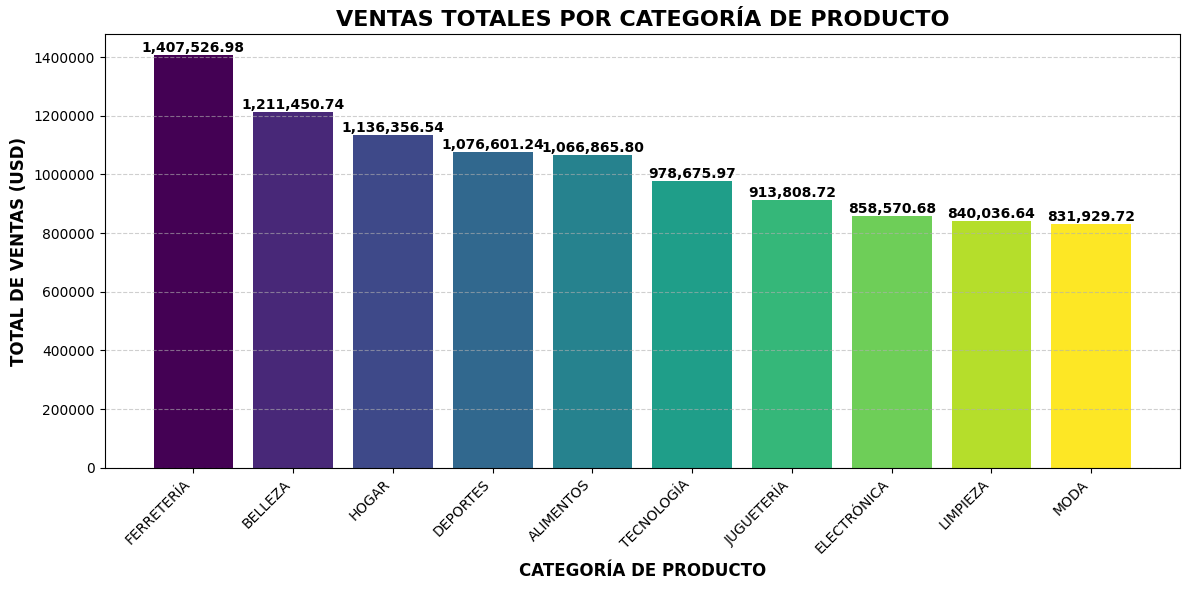

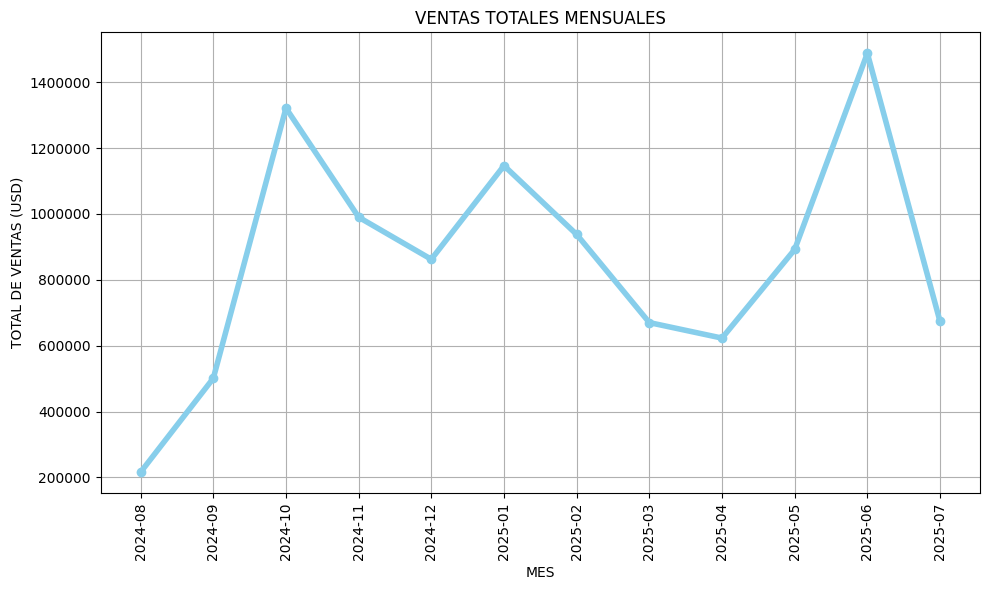

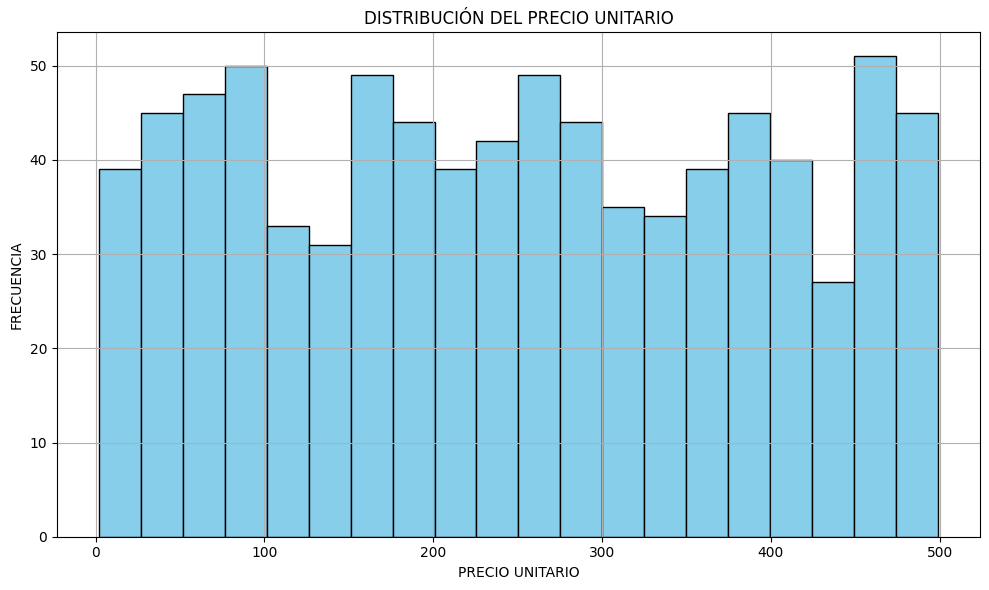

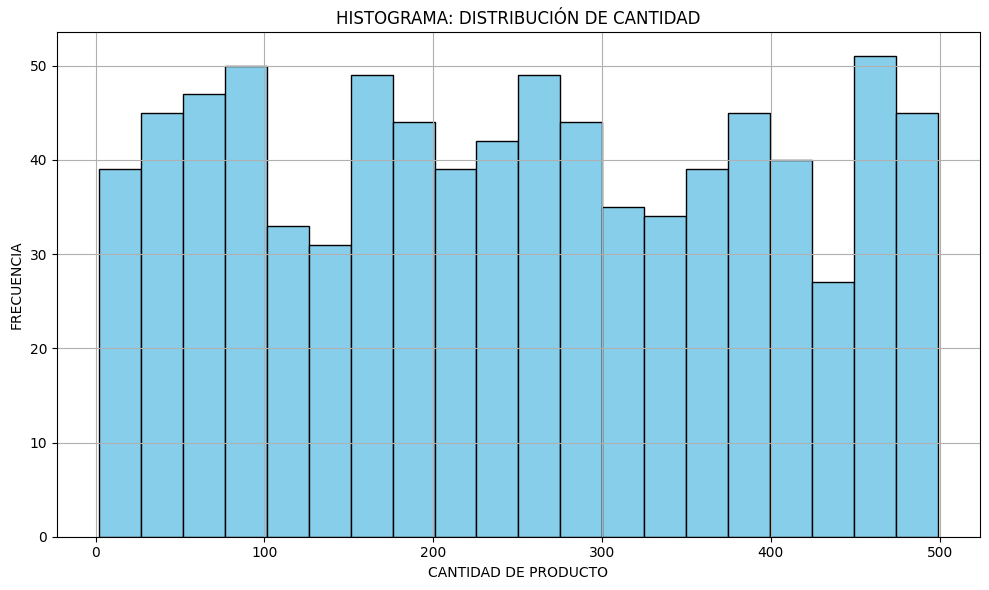

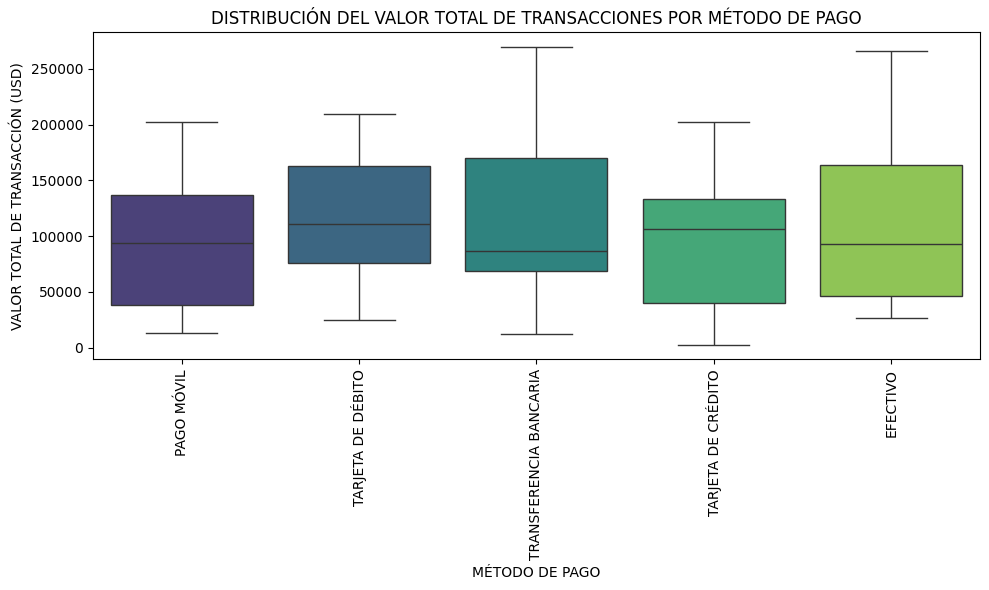

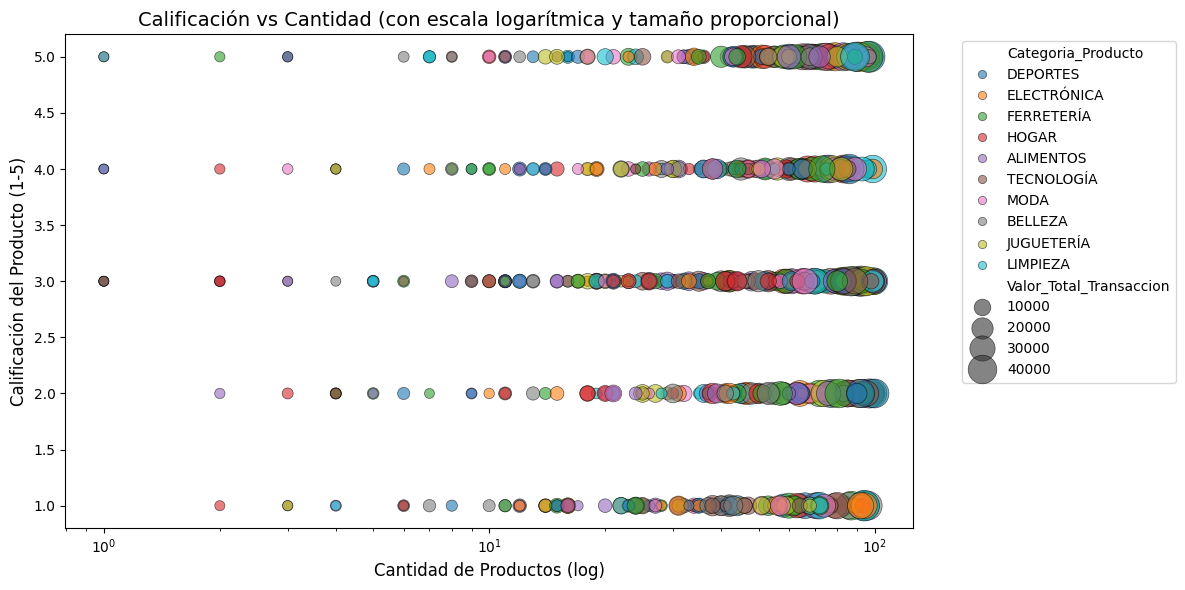

In [ ]:
# Ordenar el DataFrame por ventas totales (de mayor a menor)
ventas_ordenadas = ventas_por_categoria_prod.sort_values(
    by="Valor_Total_Transaccion", ascending=False
)

# Datos
categorias = ventas_ordenadas["Categoria_Producto"]
valores = ventas_ordenadas["Valor_Total_Transaccion"]

# Crear figura y colores (gradiente viridis)
plt.figure(figsize=(12, 6))
colores = plt.cm.viridis(numpy.linspace(0, 1, len(categorias)))
barras = plt.bar(categorias, valores, color=colores)

# Etiquetas numéricas encima de las barras
for barra in barras:
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height(),
        f"{barra.get_height():,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight='bold'
    )

# Ajustes del gráfico
plt.title("VENTAS TOTALES POR CATEGORÍA DE PRODUCTO", fontsize=16, fontweight='bold')
plt.xlabel("CATEGORÍA DE PRODUCTO", fontsize=12, fontweight='bold')
plt.ylabel("TOTAL DE VENTAS (USD)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Un gráfico de líneas de las ventas totales a lo largo del tiempo (por mes o año).
analisis_mensual = (
    df_limpio.groupby(["Anio", "Mes_Numero"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index(name="Valor_Total_Ventas")
)
analisis_mensual["Mes_Anio"] = (
    analisis_mensual["Anio"].astype(str)
    + "-"
    + analisis_mensual["Mes_Numero"].astype(str).str.zfill(2)
)
analisis_mensual = analisis_mensual.sort_values(by="Mes_Anio")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    analisis_mensual["Mes_Anio"],
    analisis_mensual["Valor_Total_Ventas"],
    marker="o",
    color="skyblue",
    linewidth=4,
)
ax.ticklabel_format(style="plain", axis="y")
ax.set_xticks(analisis_mensual["Mes_Anio"])
ax.set_title("Ventas totales mensuales".upper())
ax.set_xlabel("Mes".upper())
ax.set_ylabel("Total de Ventas (USD)".upper())
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histograma: Distribución del Precio Unitario o cantidad
plt.figure(figsize=(10, 6))
plt.hist(df_limpio["Precio_Unitario"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución del Precio Unitario".upper())
plt.xlabel("Precio Unitario".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_limpio["Precio_Unitario"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma: Distribución de cantidad".upper())
plt.xlabel("Cantidad de producto".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Valor Total de Transacción por Método de Pago
transacciones_metodos = (
    df_limpio.groupby(["ID_Transaccion", "Metodo_Pago"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index()
)
transacciones_metodos = transacciones_metodos.sort_values(
    by="ID_Transaccion", ascending=True
)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=transacciones_metodos,
    x="Metodo_Pago",
    y="Valor_Total_Transaccion",
    palette="viridis",
    hue="Metodo_Pago",
    legend=False,
)
plt.title("Distribución del Valor Total de Transacciones por Método de Pago".upper())
plt.xlabel("Método de Pago".upper())
plt.ylabel("Valor Total de Transacción (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
# Guardar figura
plt.savefig("BoxPlot")
plt.show()

# Scatter Plot: Calificación vs Cantidad
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
x="Cantidad_Producto",
y="Calificacion_Producto",
hue="Categoria_Producto",
data=df_limpio,
size="Valor_Total_Transaccion",
sizes=(50, 500),
alpha=0.6,
edgecolor='black',
linewidth=0.5,
ax=ax
)
ax.set_xscale("log")
ax.set_title("Calificación vs Cantidad (con escala logarítmica y tamaño proporcional)", fontsize=14)
ax.set_xlabel("Cantidad de Productos (log)", fontsize=12)
ax.set_ylabel("Calificación del Producto (1-5)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


# 7️⃣ Conclusiones y Reflexión

Al analizar la información del dataset propuesto, encontramos que solo existe un item/artículos por transacción. En la vida real cuando una persona se va de compras, esta adquiere varios artículos en una sola compra, por tal motivo se mejoró la información del dataset haciendo lo siguiente: en cada transacción se generó varias compras de artículos, también cada transacción posee datos únicos (fecha,ciudad,id_cliente) para mantener la consistencia de la información, por último agregamos información más real en lo que se refiere a nombres de productos y categorias del producto al dataset.

Para realizar el ejercicio práctico planteado en la semana 1 experimentamos un gran desafío al programar en Python ya que ninguno de los integrantes habíamos tenido experiencia en dicho lenguaje de programación, por tal motivo tuvimos que investigar para solventar esa dificultad y cumplir con la tarea.  Otro dificultad hallada fue el cambiar de perspectiva con relación a como se programa en otros lenguajes de programación(Java, C#) versus Python. Hay varias instrucciones que nos dejan asombrados por la forma de hacer mucho en pocas líneas de código, todo gracias a sus robustas libraries. También pudimos evidenciar que Python al tener enteros de precisión arbitraria puede almacenar y hacer cálculos con cualquier clase de números sin tener que preocuparse por errores de tamaños de tipos(overflow) como sucede en otros lenguajes.  


## Preguntas
🟡 ¿ A que ciudad se envió mas productos?

🟡 ¿ El top 5 de los productos mas vendidos por región del pais?

🟡 ¿ Productos preferidos por ciudad, region y pais?

Nota: Cada pregunta debe contener su gráfico.

## Recomendaciones

🟡 Instalar todas las dependencias externas que sean necesarias para ejecutar el notebook.

🟡 Revisar la documentación de la API de Pandas para evitar errores en la manipulación de los datos o referencias.

🟡 Analizar mas a detalle el manejo de las libs para generar gráficos más estilizados y profesionales.  
 
🟡 Si se requiere alguna modificación del data set solo se debe Cambiar los valores de las constantes a requerimiento del cientifico de datos.  

# Puntos de Mejora
1️⃣Manejo de Nulos:                                                                  
 Se escogió el valor de la moda para llenar los valores nulos en la columna ciudad_envio por los siguientes razones:
 - Es un campo categórico (texto) y no tiene un orden numérico que permita calcular media o mediana.
 - La moda es estadísticamente adecuada para atributos categóricos porque representa el valor más común y esperado en la distribución.
 - Usar la moda preserva el máximo número de registros, evitando el sesgo 

 Se escogió el valor de la moda para llenar los valores nulos en la columna calificación_Producto por los siguientes razones:
 - Aunque es numérico, representa categorías (1 a 5 estrellas, por ejemplo), por lo que la media puede no ser representativa porque podría tener una calificación con decimales cuasando mas inconvenientes
 - Al imputar con la moda, se asigna a los valores faltantes el dato que más se repite en el conjunto, lo que refleja el comportamiento mayoritario y mantiene la coherencia estadística de la variable.
 
2️⃣Validación de datos numéricos Outlier
Se creo 2 variables condicion_producto y condicion_precio las cuales tienen las condiciones para mantener los datos válidos en cuanto a la cantidad del producto y precio, esto se realiza para no recorrer 2 veces el dataset ya que se necesita guardar en otro dataset los registros a eliminar utilizando este signo (~) negamos la condición, luego mostramos las filas a eliminar del dataset.

3️⃣Ingeniería de Características
Se creo la columna día de la semana como se puede evidenciar al imprimir el dataset df_limpio

4️⃣Calidad de las visualizaciones
* En el histograma donde se representa el Precio_Unitario y Cantidad se ajusto los bins para obtener una mejor visualización de los datos.
* Se utilizó Matplotlib en el gráfico ventas totales de categoría del producto, mejorando significativamente la comprensión del gráfico.
* El scatter plot de "Calificación del Producto vs. Cantidad" se mejoró realizando lo siguiente:               
Eje X: Cantidad de Productos (log) → Escala logarítmica que facilita visualizar rangos amplios de cantidades.                        
Eje Y: Calificación del Producto (1-5) → Valores discretos entre 1 y 5.                                                
Tamaño de las burbujas: Representa el Valor Total de la Transacción (mayor tamaño = mayor valor monetario).                                         
Colores: Representan diferentes Categorías de Producto (ej. DEPORTES, ELECTRÓNICA, HOGAR, etc.).                                          

5️⃣Resultados obtenidos en el EDA
Los resultados están sujetos a cambio ya que los datos se generan randómicamente cada vez que se ejecuta la carga del dataset.
* En el primer gráfico correspondiente a ventas totales por categoría del producto, nos señala que la categoría de electrónica es la que más a vendido con (1'191.294,71) y la categoría de limpieza es la más baja en ventas (839.564,99).
* En el segundo gráfico podemos evidenciar que en enero del 2025 es donde se vendió más (1'600.000) dólares.
* En el gráfico de transacciones por método de pago se observa que:
tarjeta de crédito:	tiene una mediana alta, es el método de pago con transacciones más elevadas en promedio. También tiene varios outliers de alto valor.           
Tarjeta de débito:	Tiene una mediana moderada, pero una gran dispersión de valores. Hay transacciones de bajo valor y algunas muy altas.
Efectivo:	Presenta la mayor dispersión (bigotes más largos), lo que indica transacciones muy variadas. Tiene valores bajos y altos.
Transferencia bancaria:	Aunque tiene valores bajos, su mediana y caja indican que la mayoría de las transacciones son pequeñas a moderadas.
No hay una relación clara entre la cantidad de productos comprados y la calificación (se ven calificaciones bajas y altas en todos los rangos de cantidad).

* En el último gráfico Las categorías con mayores valores de transacción (burbujas grandes) suelen concentrarse en calificaciones de 3 a 5, destacando FERRETERÍA, TECNOLOGÍA y HOGAR. La escala logarítmica permite visualizar tanto productos con pocas unidades como con grandes cantidades. Hay muchos productos con calificación 3, lo que podría indicar neutralidad o insatisfacción moderada. Existen productos mal calificados pero con alto valor o cantidad, lo que podría señalar oportunidades de mejora en calidad o servicio.
